In [216]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime as dt
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import zipfile

plt.style.use("ggplot")
sns.set_theme(style="whitegrid")

In [35]:
train = pd.read_csv("train.csv") # shape = (230130, 6), size = 1380780, ndim = 2
test = pd.read_csv("test.csv")   # shape = (98550, 5), size = 492750, ndim = 2

In [36]:
train.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [37]:
test.head()

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98550 entries, 0 to 98549
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       98550 non-null  int64 
 1   date     98550 non-null  object
 2   country  98550 non-null  object
 3   store    98550 non-null  object
 4   product  98550 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [41]:
train.isnull().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

In [42]:
test.isnull().sum()

id         0
date       0
country    0
store      0
product    0
dtype: int64

In [44]:
train.describe()

,id,num_sold
count,230130.000000,221259.000000
mean,115064.500000,752.527382
std,66432.953062,690.165445
min,0.000000,5.000000
25%,57532.250000,219.000000
50%,115064.500000,605.000000
75%,172596.750000,1114.000000
max,230129.000000,5939.000000


In [45]:
test.describe()

,id
count,98550.000000
mean,279404.500000
std,28449.078852
min,230130.000000
25%,254767.250000
50%,279404.500000
75%,304041.750000
max,328679.000000


<Axes: >

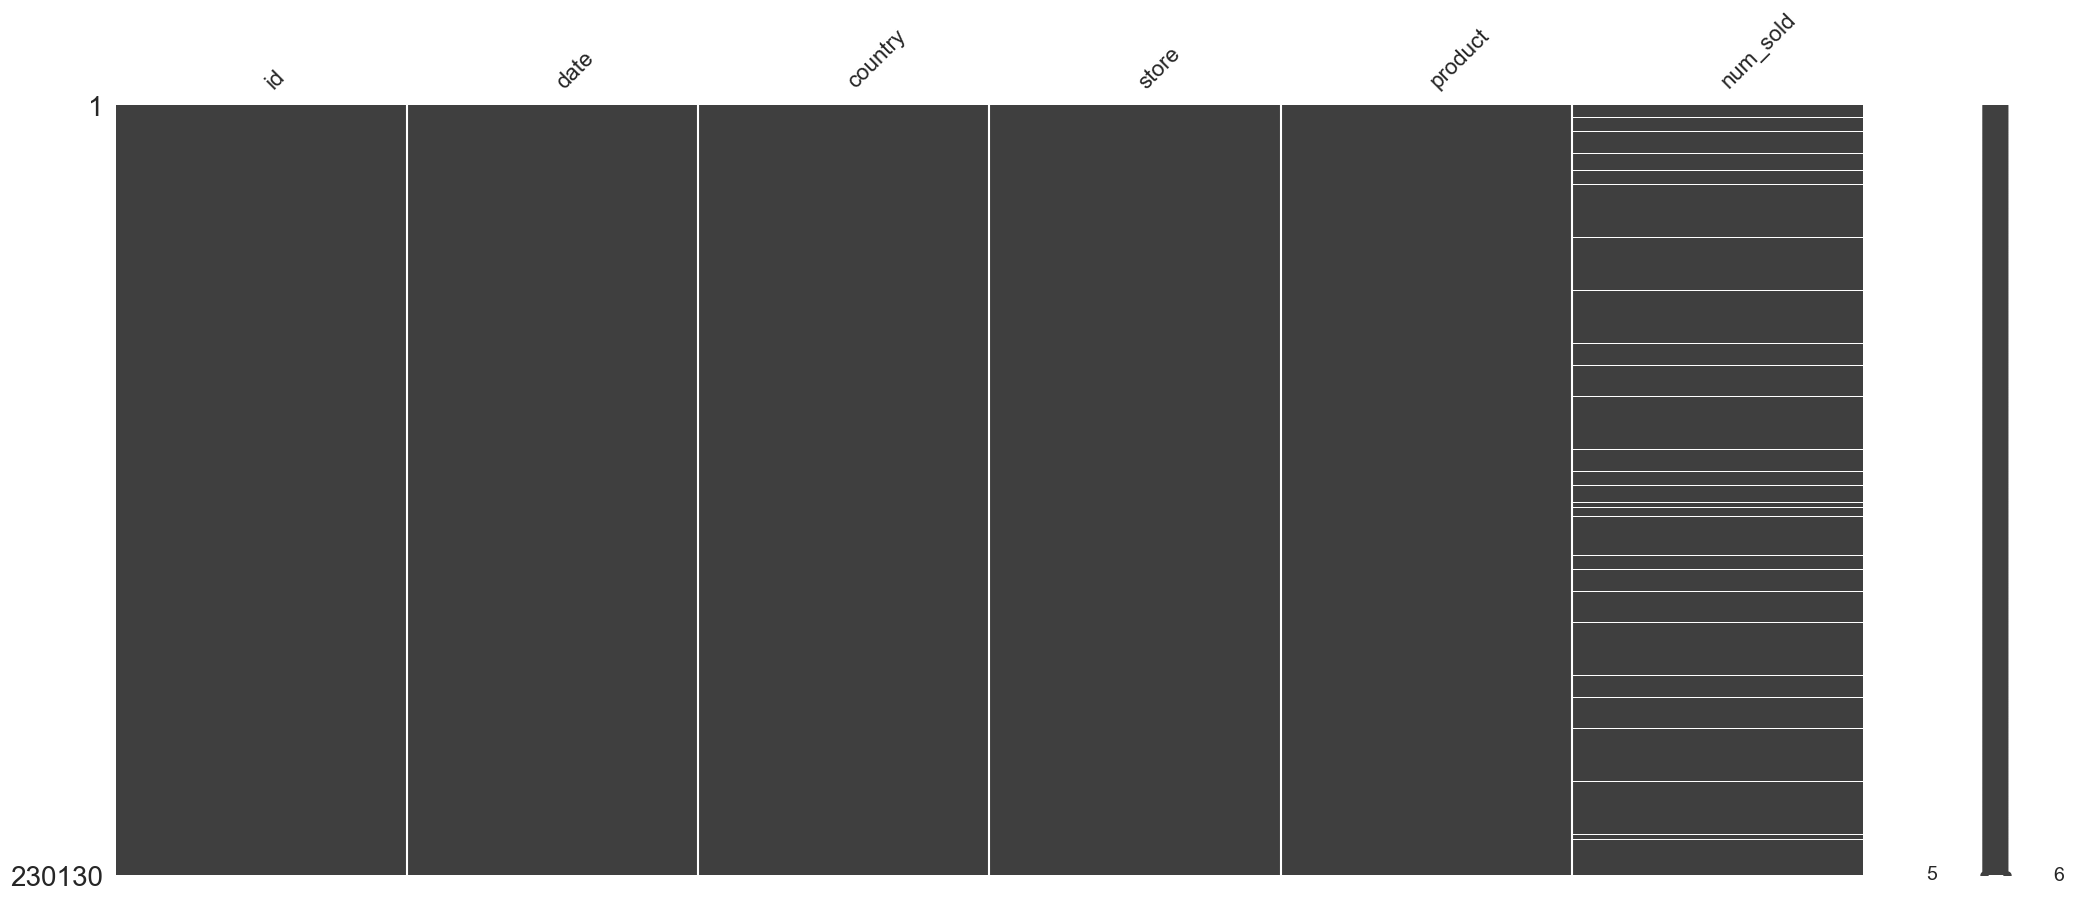

In [43]:
msno.matrix(train)

In [51]:
missing_ratio = train["num_sold"].isnull().sum() / len(train)
print(f" Доля пропущенных значений: {missing_ratio} ")

train = train.dropna(subset=["num_sold"])

 Доля пропущенных значений: 0.038547777343240774 


<Axes: >

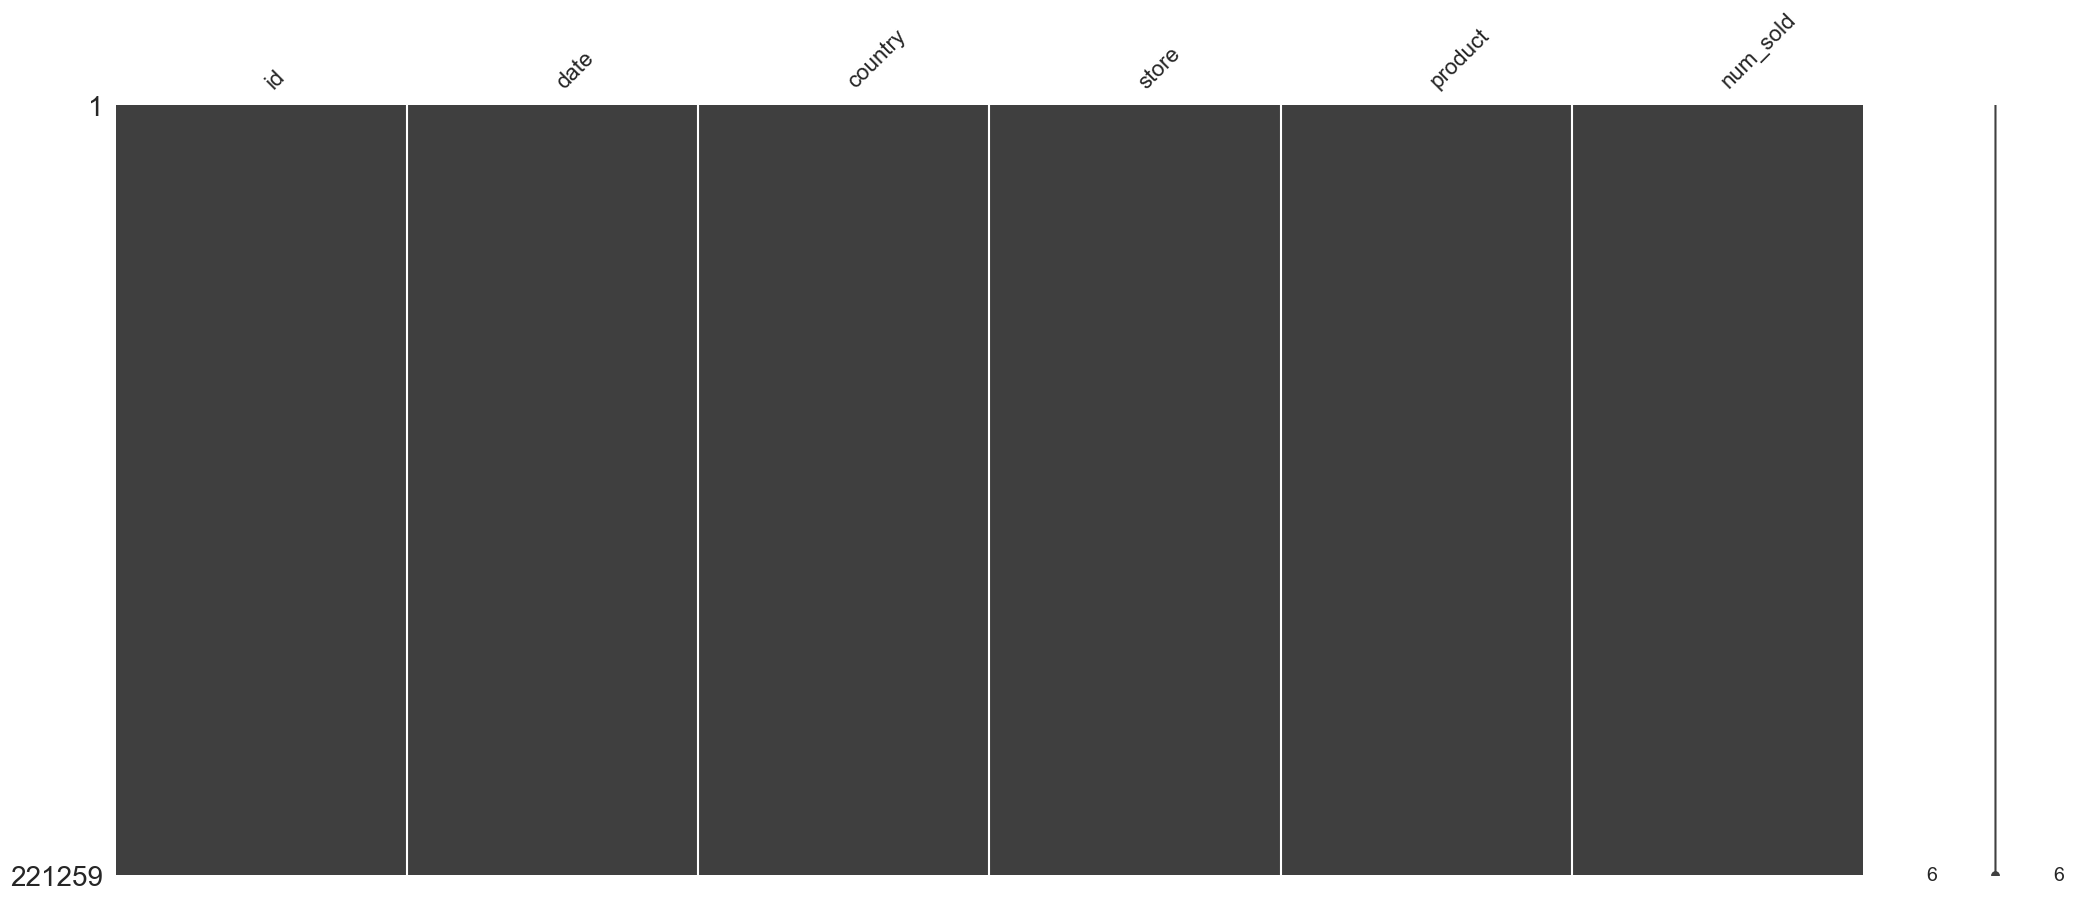

In [52]:
msno.matrix(train)

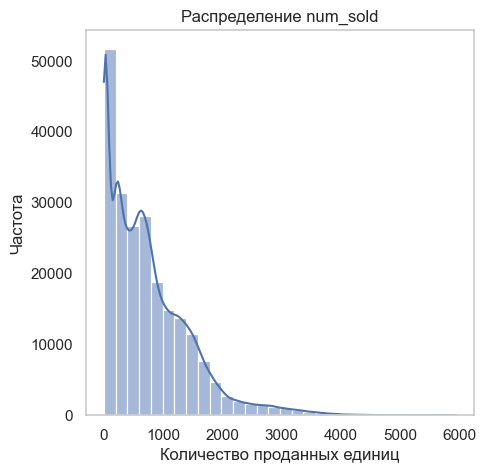

In [67]:
plt.figure(figsize=(5, 5))
sns.histplot(train["num_sold"], bins=30, kde=True)
plt.title("Распределение num_sold")
plt.xlabel("Количество проданных единиц")
plt.ylabel("Частота")
#plt.legend()
plt.grid()
plt.show()

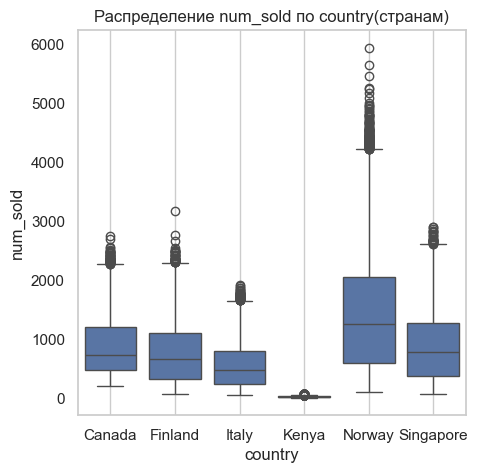

In [76]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="country", y="num_sold", data=train)
plt.title("Распределение num_sold по country(странам)")
#plt.legend()
plt.grid()
plt.show()

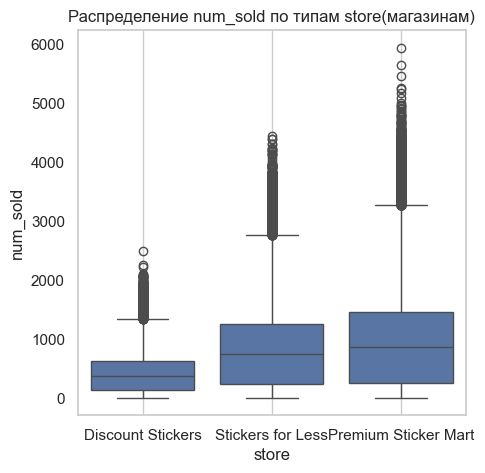

In [79]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="store", y="num_sold", data=train)
plt.title("Распределение num_sold по типам store(магазинам)")
plt.grid()
plt.show()

In [95]:
train["date"] = pd.to_datetime(train["date"])
train["year"] = train["date"].dt.year
train["month"] = train["date"].dt.month
train["day_of_week"] = train["date"].dt.dayofweek
train

,id,date,country,store,product,num_sold,year,month,day_of_week
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,2010,1,4
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,4
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,2010,1,4
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,4
5,5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0,2010,1,4
...,...,...,...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0,2016,12,5
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0,2016,12,5
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,2016,12,5
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0,2016,12,5


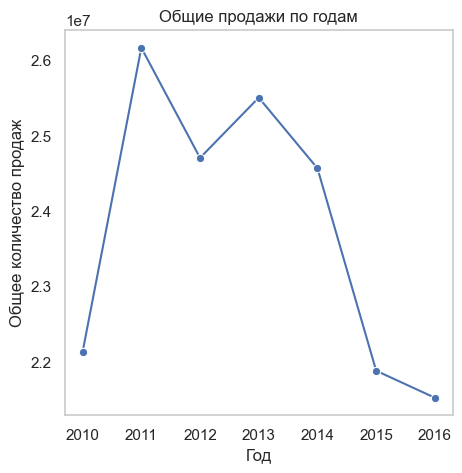

C:\Users\Slay Bitch\AppData\Local\Temp\ipykernel_8712\3079576536.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="month", y="num_sold", data=monthly_sales, palette="viridis")


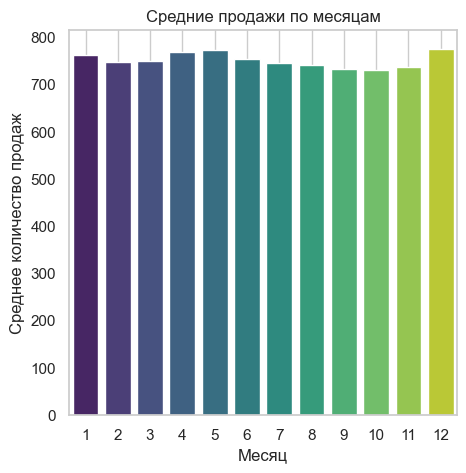

C:\Users\Slay Bitch\AppData\Local\Temp\ipykernel_8712\3079576536.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='num_sold', data=weekday_sales, palette='coolwarm')


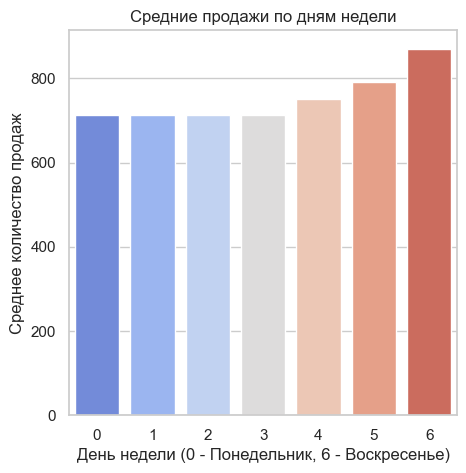

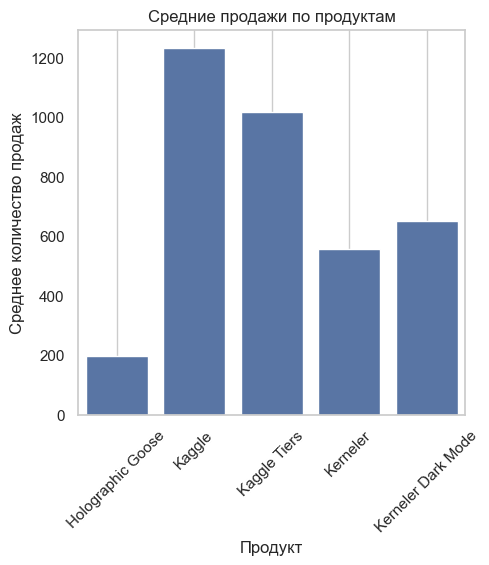

In [134]:
yearly_sales = train.groupby("year")["num_sold"].sum().reset_index()
monthly_sales = train.groupby("month")["num_sold"].mean().reset_index()
weekday_sales = train.groupby("day_of_week")["num_sold"].mean().reset_index()
product_sales = train.groupby("product")["num_sold"].mean().reset_index()

plt.figure(figsize=(5, 5))
sns.lineplot(x="year", y="num_sold", data=yearly_sales, marker="o")
plt.title("Общие продажи по годам")
plt.xlabel("Год")
plt.ylabel("Общее количество продаж")
plt.grid()
#plt.legend()
plt.show()

plt.figure(figsize=(5, 5))
sns.barplot(x="month", y="num_sold", data=monthly_sales, palette="viridis")
plt.title("Средние продажи по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Среднее количество продаж")
plt.grid()
plt.show()

plt.figure(figsize=(5, 5))
sns.barplot(x='day_of_week', y='num_sold', data=weekday_sales, palette='coolwarm')
plt.title('Средние продажи по дням недели')
plt.xlabel('День недели (0 - Понедельник, 6 - Воскресенье)')
plt.ylabel('Среднее количество продаж')
plt.show()

plt.figure(figsize=(5, 5))
sns.barplot(x="product", y="num_sold", data=product_sales)
plt.title("Средние продажи по продуктам")
plt.xlabel("Продукт")
plt.ylabel("Среднее количество продаж")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [142]:
# OHE

encoded = pd.get_dummies(train, columns=["country", "store", "product"])

encoded.head()

,id,date,num_sold,year,month,day_of_week,country_Canada,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,store_Discount Stickers,store_Premium Sticker Mart,store_Stickers for Less,product_Holographic Goose,product_Kaggle,product_Kaggle Tiers,product_Kerneler,product_Kerneler Dark Mode
1,1,2010-01-01,973.0,2010,1,4,True,False,False,False,False,False,True,False,False,False,True,False,False,False
2,2,2010-01-01,906.0,2010,1,4,True,False,False,False,False,False,True,False,False,False,False,True,False,False
3,3,2010-01-01,423.0,2010,1,4,True,False,False,False,False,False,True,False,False,False,False,False,True,False
4,4,2010-01-01,491.0,2010,1,4,True,False,False,False,False,False,True,False,False,False,False,False,False,True
5,5,2010-01-01,300.0,2010,1,4,True,False,False,False,False,False,False,False,True,True,False,False,False,False


In [174]:
x = encoded.drop(["id", "date", 'num_sold'], axis=1)
y = encoded["num_sold"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42).fit(x_train, y_train)
pred = model.predict(x_test)
mse = mean_squared_error(y_test, pred)
scores = cross_val_score(model, x, y, cv=5, scoring="neg_mean_squared_error")
print(f" Mean Squared Error (MSE): {mse} ") # 7417.869363412325

print(f"Среднее MSE: {-scores.mean()} ")

 Mean Squared Error (MSE): 7417.869363412325 
Среднее MSE: 17084.32121854354 


In [209]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=10).fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print(f"Random Forest MSE: {rf_mse} ")

Random Forest MSE: 11723.717652010966 


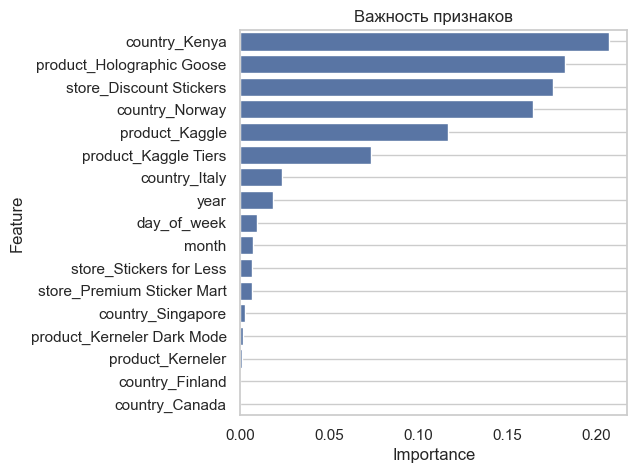

In [208]:
# Проверка важности модели.

importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({
    "Feature": x_train.columns,
    "Importance": importances
})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(5, 5))
sns.barplot(x="Importance",y="Feature", data=feature_importances)
plt.title("Важность признаков")
plt.xlabel("Importance")
plt.ylabel("Feature")
#plt.legend()
plt.grid()
plt.show()

In [212]:
test_encoded = pd.get_dummies(test, columns=['country', 'store', 'product'])
test_encoded = test_encoded.reindex(columns=x_train.columns, fill_value=0)

test_predictions = rf_model.predict(test_encoded) # +

submission = pd.DataFrame({'id': test['id'], 'num_sold': test_predictions}) # +
submission.to_csv('submission.csv', index=False) # +
print("File submission.csv is ready for sending ON Kaggle!") # +

File submission.csv is ready for sending ON Kaggle!


In [217]:
with zipfile.ZipFile('submission.zip', 'w') as zipf:
    zipf.write('submission.csv')
    zipf.write('Sticker_Sales.ipynb')

print("Архив submission.zip создан!")

Архив submission.zip создан!
